# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous Codealong, you looked at all the requirements for running an OLS simple regression using Statsmodels. You worked with the height-weight data to understand the process and all the necessary steps that must be performed. In this lab , you'll explore slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [87]:
# Load necessary libraries and import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Decided to set a pretty style to use for plots
plt.style.use('seaborn')

#Import data
df = pd.read_csv('advertising.csv')

In [31]:
# Check the columns and first few rows
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
#Drop extra index column
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
# Get the 5-point statistics for data 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [34]:
# Describe the contents of this dataset
print(df.isna().sum())
'''
There are 200 datapoints. There are no null values. 
It is completely unclear which advertising channel impacts sales the most.
I am unsure what the datapoints represent in TV, radio, and newspaper columns (number of adverts? dollars spent?) 
Whatever it is representing, there is more of it in TV.
'''

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


'\nThere are 200 datapoints. There are no null values. \nIt is completely unclear which advertising channel impacts sales the most.\nI am unsure what the datapoints represent in TV, radio, and newspaper columns (number of adverts? dollars spent?) \nWhatever it is representing, there is more of it in TV.\n'

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

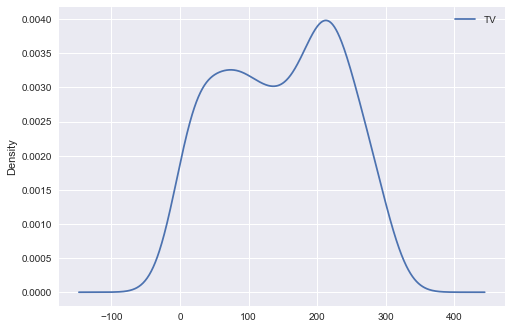

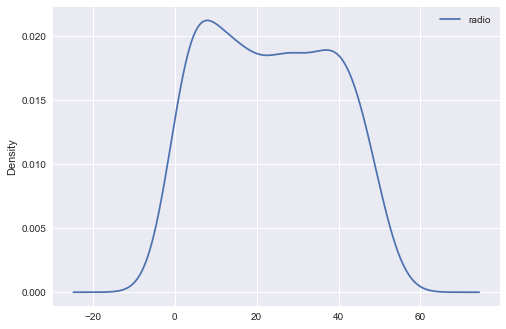

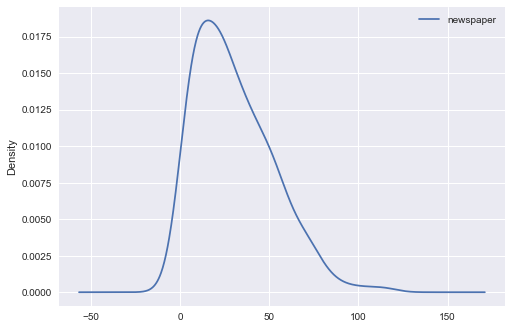

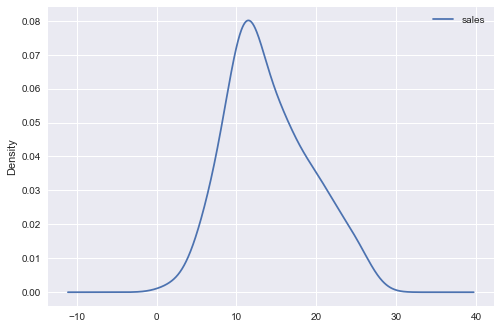

In [85]:
# For all the variables, check distribution by creating a histogram with kde
df.TV.plot.kde(label='TV')
plt.legend()
plt.show()

df.radio.plot.kde(label='radio')
plt.legend()
plt.show()

df.newspaper.plot.kde(label='newspaper')
plt.legend()
plt.show()

df.sales.plot.kde(label='sales')
plt.legend()
plt.show()

In [ ]:
# Record your observations here 
'''
All: Every plot is asymmetrical
TV: Two peaks, skewed left-ish?
radio: Two peaks, skewed right-ish?
newspaper: skewed right
sales: skewed right
'''


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

'\n#add subplots: rows cols index\nax1 = my_figure.add_subplot(131)\nax2 = my_figure.add_subplot(132)\nax3 = my_figure.add_subplot(133)\n\n#Add scatterplots\nax1.scatter(df.TV,df.sales,label="TV")\nax1.set_xlabel("TV")\nax1.legend()\nax2.scatter(df.radio,df.sales,label="radio")\nax2.set_xlabel("radio")\nax2.legend()\nax3.scatter(df.newspaper,df.sales,label="newspaper")\nax3.set_xlabel("newspaper")\nax3.legend()\n'

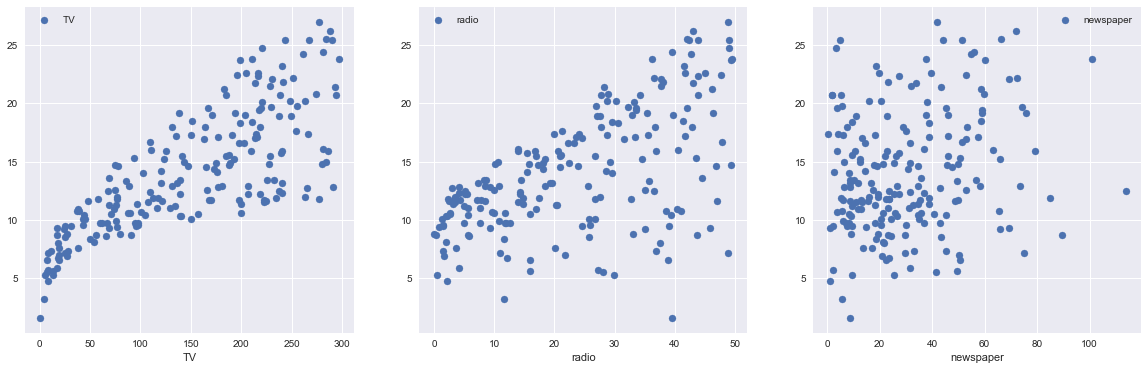

In [105]:
# visualize the relationship between the preditors and the target using scatterplots
my_figure = plt.figure(figsize=(20,6))

for idx, col in enumerate(df.columns[1:4]):
    #Add subplot: rows = 1, columns = 3, index = [1,2,3]
    ax = my_figure.add_subplot(1,3,idx+1)
    
    #make the scatter plot
    ax.scatter(df[col],df.sales,label=col)
    ax.set_xlabel(col)
    ax.legend()

'''
#add subplots: rows cols index
ax1 = my_figure.add_subplot(131)
ax2 = my_figure.add_subplot(132)
ax3 = my_figure.add_subplot(133)

#Add scatterplots
ax1.scatter(df.TV,df.sales,label="TV")
ax1.set_xlabel("TV")
ax1.legend()
ax2.scatter(df.radio,df.sales,label="radio")
ax2.set_xlabel("radio")
ax2.legend()
ax3.scatter(df.newspaper,df.sales,label="newspaper")
ax3.set_xlabel("newspaper")
ax3.legend()
'''

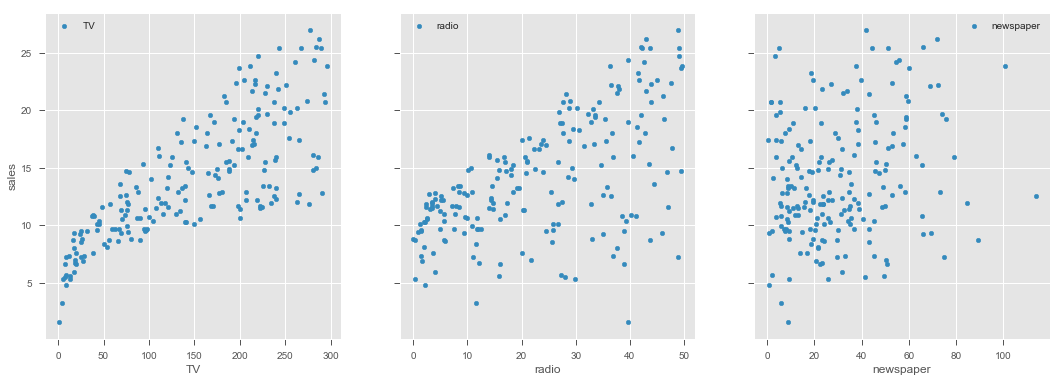

In [57]:
# visualize the relationship between the preditors and the target using scatterplots


In [ ]:
# Record yor observations on linearity here 
'''
It all looks like a mess compared to what we've seen in other labs.
There appears to be a linear relationship between sales and TV despite the variance increasing.
There is a possible linear relationship with radio. The error appears to be more on the negative
side with increasing variance.
There doesn't seem to be any linear relationship with newspaper.
'''

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [106]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# build the formula 
f='sales~TV'

# create a fitted model in one line
model = ols(formula=f, data=df).fit()

## Step 5: Get Regression Diagnostics Summary

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 May 2019   Prob (F-statistic):           1.47e-42
Time:                        23:41:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [115]:
# create a DataFrame with the minimum and maximum values of TV
min_max = pd.DataFrame(data=[df.TV.min(), df.TV.max()], columns=['TV'])
min_max

,TV
0,0.7
1,296.4


In [127]:
# make predictions for those x values and store them
min_max['pred_sales'] = model.predict(min_max)
min_max

,TV,pred_sales
0,0.7,7.065869
1,296.4,21.122454


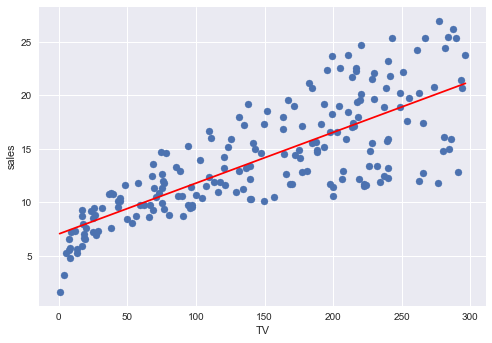

In [128]:
# first, plot the observed data and then least squares line
plt.scatter(df.TV,df.sales)
plt.xlabel("TV")
plt.ylabel("sales")
plt.plot(min_max.TV,min_max.pred_sales, color='red')

## Step 7: Visualize the error term for variance and heteroscedasticity

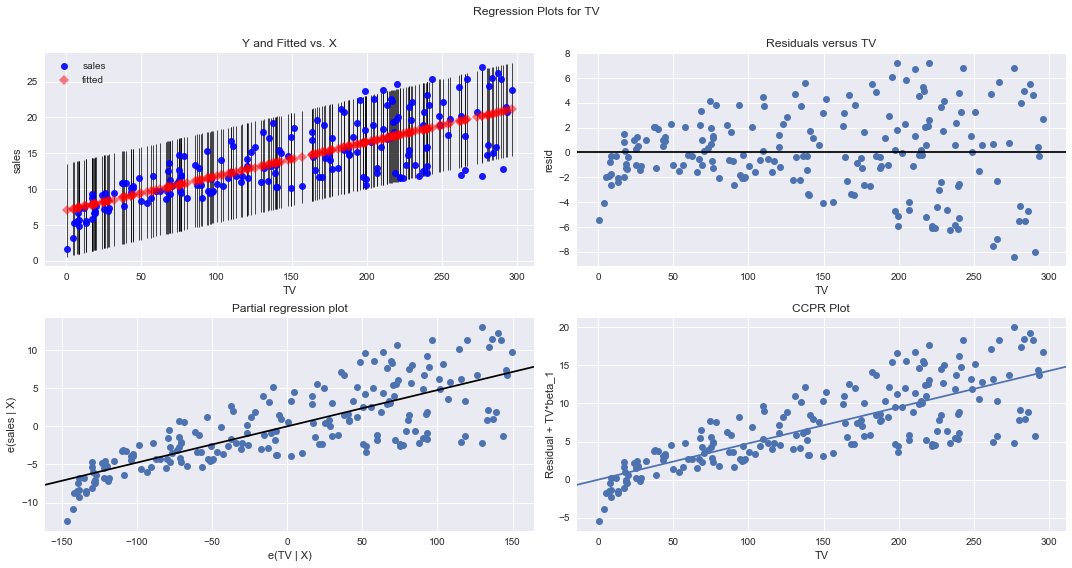

In [131]:
error_term_fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"TV",fig=error_term_fig)
plt.show()

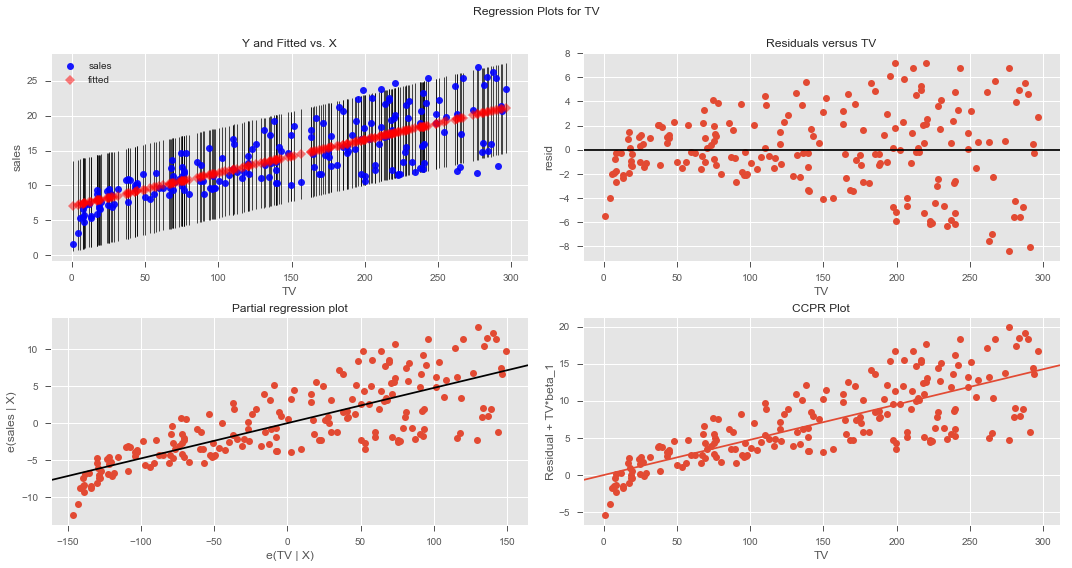

In [ ]:
# Record Your observations on heteroscedasticity
'''
The relationship appears to be heteroscedastic because the residuals are not similarly distributed
for the entire range of the independent variable (TV). They increase. If they remained about the same the residuals
would be homoscedastic.
'''

## Step 8: Check the normality assumptions by creating a QQ-plot

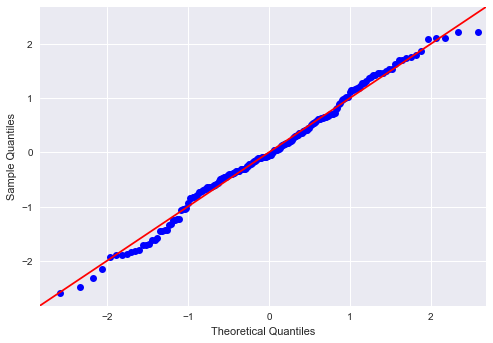

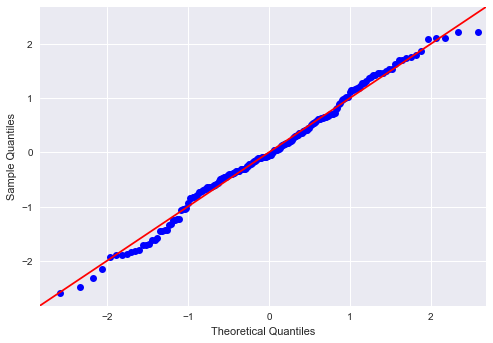

In [132]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
# Record Your observations on the normality assumption
'''
The residuals appear to be normally distributed - no significant outliers.
'''


## Step 9: Repeat the above for radio and record your observations

In [133]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
# build the formula 
f='sales~radio'

# create a fitted model in one line
model2 = ols(formula=f, data=df).fit()

In [135]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 24 May 2019   Prob (F-statistic):           4.35e-19
Time:                        00:28:11   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
min_max_radio = pd.DataFrame(data=[df.radio.min(), df.radio.max()], columns=['radio'])
min_max_radio['pred_sales'] = model2.predict(min_max_radio)
min_max_radio

,radio,pred_sales
0,0.0,9.311638
1,49.6,19.355429


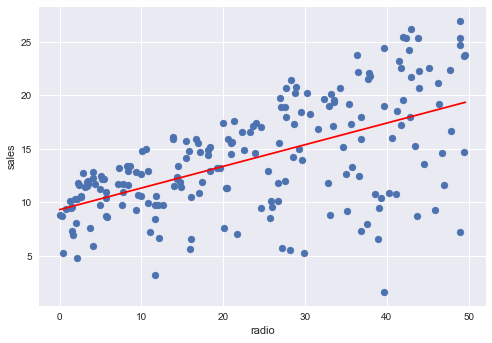

In [137]:
#observed data and then least squares line
plt.scatter(df.radio,df.sales)
plt.xlabel("radio")
plt.ylabel("sales")
plt.plot(min_max_radio.radio,min_max_radio.pred_sales, color='red')

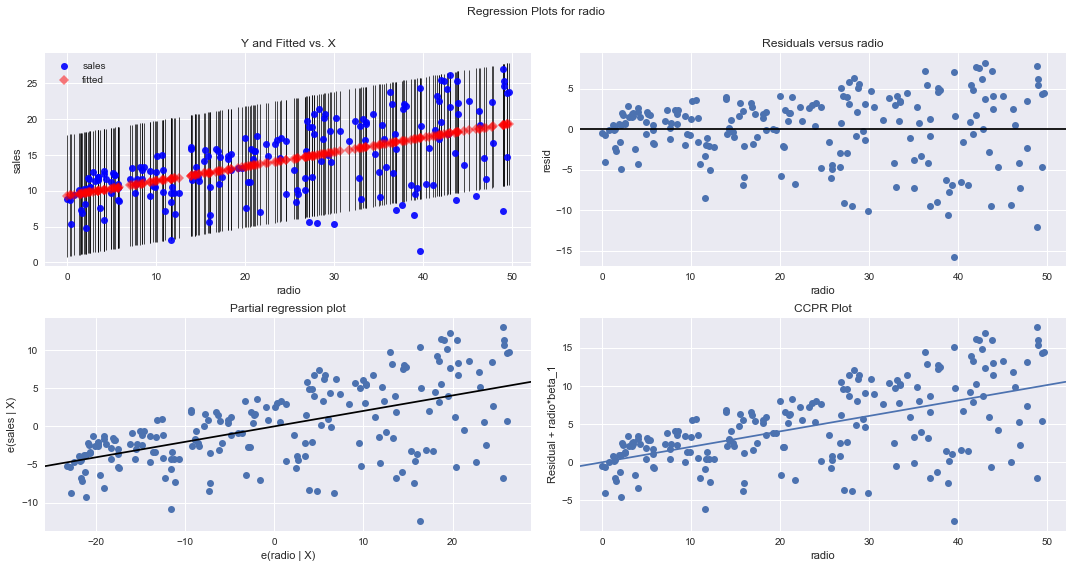

In [138]:
#Error Term Variance
error_term_fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2,"radio",fig=error_term_fig)
plt.show()

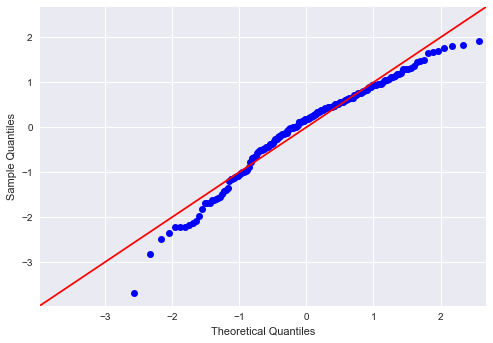

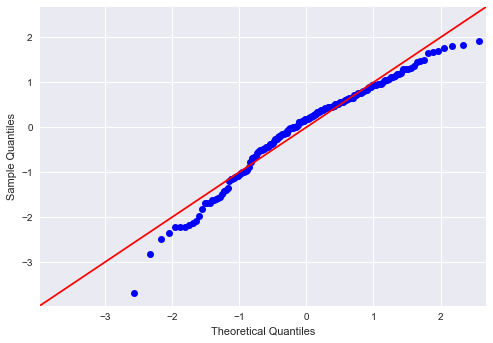

In [139]:
residuals_radio = model2.resid
sm.graphics.qqplot(residuals_radio,dist=stats.norm,line='45',fit=True)

In [79]:
# Record your observations here for goodnes of fit 
'''
The fit is much worse. Residuals are not normally distributed.
'''

## The Answer

Based on above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of technqiues we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You looked for the regression assumptions before and after the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 